In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2

In [28]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from tensorflow.keras.models import Sequential
import tensorflow
from sklearn.model_selection import train_test_split

np.random.seed(1)

In [4]:
%cd C:\Users\nsidd\OneDrive\Desktop

C:\Users\nsidd\OneDrive\Desktop


In [5]:
train_images = []
train_labels = []
shape = (200,200)
train_path = "C:/Users/nsidd/OneDrive/Desktop/Fruits Object Detection/train_zip/train"

In [6]:
train_path

'C:/Users/nsidd/OneDrive/Desktop/Fruits Object Detection/train_zip/train'

In [7]:
for filename in os.listdir("C:/Users/nsidd/OneDrive/Desktop/Fruits Object Detection/train_zip/train"):
    if filename.split(".")[1]== "jpg":
        img = cv2.imread(os.path.join(train_path,filename))
        train_labels.append(filename.split("_")[0])
        img = cv2.resize(img,shape)
        train_images.append(img)
train_labels = pd.get_dummies(train_labels).values

train_images = np.array(train_images)

X_train,X_val,y_train,y_val = train_test_split(train_images,train_labels,random_state=1)

In [8]:
test_images=[]
test_labels = []
shape = (200,200)
test_path = "C:/Users/nsidd/OneDrive/Desktop/Fruits Object Detection/test_zip/test"

In [9]:
for filename in os.listdir("C:/Users/nsidd/OneDrive/Desktop/Fruits Object Detection/test_zip/test"):
    if filename.split(".")[1]== "jpg":
        cv2.imread(os.path.join(test_path,filename))
        test_labels.append(filename.split("_")[0])
        img = cv2.resize(img,shape)
        test_images.append(img)
        
test_images = np.array(test_images)

[1 0 0 0]


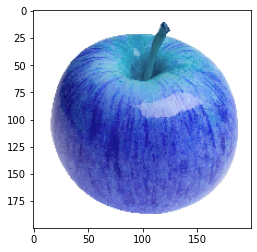

In [46]:
print(train_labels[1])
plt.imshow(train_images[1])

[0 1 0 0]


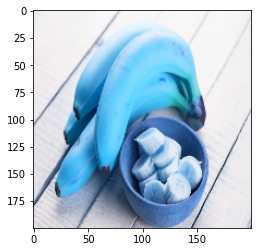

In [47]:
print(train_labels[133])
plt.imshow(train_images[133])

In [48]:
# We have Apple, Banana, Mixed, Orange kind of Fruits in our Dataset

In [49]:
#Lets Build CNN Model

In [54]:
## Creating a Sequential model
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32,activation='tanh', input_shape=(200,200,3,)))
model.add(Conv2D(filters= 32,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=64,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=64,kernel_size = (3,3),activation='tanh'))

model.add(Flatten())

model.add(Dense(20,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(4,activation = 'softmax'))

In [55]:
#opt = tensorflow.keras.optimizers.Adam(learning_rate = 0.01)
model.compile(loss = "categorical_crossentropy", metrics= ['accuracy'], optimizer = "Adam")

In [56]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 198, 198, 32)      896       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 196, 196, 32)      9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 96, 96, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 46, 46, 64)        36928     
_________________________________________________________________
flatten_7 (Flatten)          (None, 135424)           

In [57]:
hist = model.fit(X_train, y_train, epochs = 50, batch_size = 50, validation_data= (X_val,y_val))

Train on 180 samples, validate on 60 samples
Epoch 1/50
180/180 [==============================] - 14s 77ms/sample - loss: 8.8265 - acc: 0.2944 - val_loss: 5.8916 - val_acc: 0.3000
Epoch 2/50
180/180 [==============================] - 13s 75ms/sample - loss: 3.6893 - acc: 0.2778 - val_loss: 2.4349 - val_acc: 0.1500
Epoch 3/50
180/180 [==============================] - 13s 74ms/sample - loss: 1.9675 - acc: 0.2944 - val_loss: 2.3589 - val_acc: 0.5500
Epoch 4/50
180/180 [==============================] - 14s 75ms/sample - loss: 1.7295 - acc: 0.5833 - val_loss: 1.0170 - val_acc: 0.5833
Epoch 5/50
180/180 [==============================] - 14s 76ms/sample - loss: 1.0408 - acc: 0.6000 - val_loss: 0.8239 - val_acc: 0.6500
Epoch 6/50
180/180 [==============================] - 14s 79ms/sample - loss: 0.7140 - acc: 0.6444 - val_loss: 0.5692 - val_acc: 0.8167
Epoch 7/50
180/180 [==============================] - 15s 82ms/sample - loss: 0.5600 - acc: 0.8000 - val_loss: 0.4308 - val_acc: 0.9000
Epo

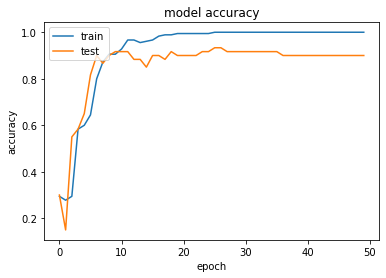

In [58]:
# summarize history for accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

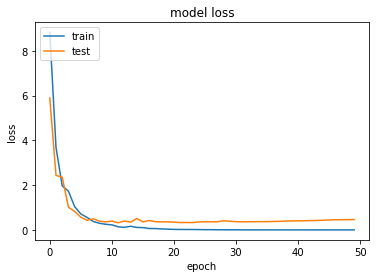

In [59]:
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [60]:
 #Evaluating model on validation data
evaluate = model.evaluate(X_val,y_val)
print(evaluate)

60/60 [==============================] - 1s 11ms/sample - loss: 0.4635 - acc: 0.9000
[0.4635296026865641, 0.9]


In [62]:
# Testing predictions and the actual label
checkImage = train_images[0:1]
checklabel = train_labels[0:1]

predict = model.predict(np.array(checkImage))

output = { 0:'apple',1:'banana',2:'mixed',3:'orange'}

print("Actual :- ",checklabel)
print("Predicted :- ",output[np.argmax(predict)])

Actual :-  [[1 0 0 0]]
Predicted :-  apple
